In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import PIL
from PIL import Image
from IPython.display import display
import os
import json

In [2]:
!unzip -uq "/content/drive/MyDrive/기업연계프로젝트/testset.zip"

In [4]:
from tqdm.notebook import tqdm

In [ ]:
base_path = "/content/drive/MyDrive/기업연계프로젝트"

In [19]:
len(os.listdir("/content/testset_crop/middle_q"))

334

In [12]:
detector = cv2.dnn.readNetFromCaffe("deploy.prototxt" , "/content/res10_300x300_ssd_iter_140000.caffemodel")

In [17]:
face_cascade2 = cv2.CascadeClassifier('/content/drive/MyDrive/기업연계프로젝트/haarcascade_profileface.xml')

In [27]:
lst = sorted(os.listdir("/content/high_q"))
t = 0
for f in tqdm(lst):
    image = cv2.imread(os.path.join("/content/high_q", f))
    base_img = image.copy()
    original_size = base_img.shape
    target_size = (300, 300)
    image = cv2.resize(image, target_size)
    aspect_ratio_x = (original_size[1] / target_size[1])
    aspect_ratio_y = (original_size[0] / target_size[0])
    imageBlob = cv2.dnn.blobFromImage(image = image)
    detector.setInput(imageBlob)
    detections = detector.forward()
    column_labels = ["img_id", "is_face", "confidence", "left", "top", "right", "bottom"]
    detections_df = pd.DataFrame(detections[0][0], columns = column_labels)
    detections_df = detections_df[detections_df['is_face'] == 1]
    detections_df = detections_df[detections_df['confidence'] >= 0.60]
    detections_df['left'] = (detections_df['left'] * 300).astype(int)
    detections_df['bottom'] = (detections_df['bottom'] * 300).astype(int)
    detections_df['right'] = (detections_df['right'] * 300).astype(int)
    detections_df['top'] = (detections_df['top'] * 300).astype(int)
    if len(detections_df) >= 2:
        t+=1
        idx = 0
        size = 0
        for i, instance in detections_df.iterrows():
            if (instance["bottom"] - instance["top"]) * (instance["right"] - instance["left"]) > size:
                size = (instance["bottom"] - instance["top"]) * (instance["right"] - instance["left"])
                idx = i
        instance = detections_df.iloc[idx, :]
        left = instance["left"]; right = instance["right"]
        bottom = instance["bottom"]; top = instance["top"]
        detected_face = base_img[int(top*aspect_ratio_y):int(bottom*aspect_ratio_y) ,int(left*aspect_ratio_x):int(right*aspect_ratio_x)]
        cv2.imwrite(os.path.join("/content/testset_crop/high_q", f), detected_face[:,:,::-1])  

    else:
        t+=1
        instance = detections_df.iloc[0, :]
        left = instance["left"]; right = instance["right"]
        bottom = instance["bottom"]; top = instance["top"]
        detected_face = base_img[int(top*aspect_ratio_y):int(bottom*aspect_ratio_y) ,int(left*aspect_ratio_x):int(right*aspect_ratio_x)]
        cv2.imwrite(os.path.join("/content/testset_crop/high_q", f), detected_face[:,:,::-1])


    plt.imshow(detected_face[:,:,::-1])
    plt.show()  

print(t)


Output hidden; open in https://colab.research.google.com to view.

In [22]:
lst = sorted(os.listdir("/content/middle_q"))
t = 0
for f in tqdm(lst):
    image = cv2.imread(os.path.join("/content/middle_q", f))
    base_img = image.copy()
    original_size = base_img.shape
    target_size = (300, 300)
    image = cv2.resize(image, target_size)
    aspect_ratio_x = (original_size[1] / target_size[1])
    aspect_ratio_y = (original_size[0] / target_size[0])
    imageBlob = cv2.dnn.blobFromImage(image = image)
    detector.setInput(imageBlob)
    detections = detector.forward()
    column_labels = ["img_id", "is_face", "confidence", "left", "top", "right", "bottom"]
    detections_df = pd.DataFrame(detections[0][0], columns = column_labels)
    detections_df = detections_df[detections_df['is_face'] == 1]
    detections_df = detections_df[detections_df['confidence'] >= 0.60]
    detections_df['left'] = (detections_df['left'] * 300).astype(int)
    detections_df['bottom'] = (detections_df['bottom'] * 300).astype(int)
    detections_df['right'] = (detections_df['right'] * 300).astype(int)
    detections_df['top'] = (detections_df['top'] * 300).astype(int)
    if len(detections_df) >= 2:
        t+=1
        idx = 0
        size = 0
        for i, instance in detections_df.iterrows():
            if (instance["bottom"] - instance["top"]) * (instance["right"] - instance["left"]) > size:
                size = (instance["bottom"] - instance["top"]) * (instance["right"] - instance["left"])
                idx = i
        instance = detections_df.iloc[idx, :]
        left = instance["left"]; right = instance["right"]
        bottom = instance["bottom"]; top = instance["top"]
        detected_face = base_img[int(top*aspect_ratio_y):int(bottom*aspect_ratio_y) ,int(left*aspect_ratio_x):int(right*aspect_ratio_x)]
        cv2.imwrite(os.path.join("/content/testset_crop/middle_q", f), detected_face[:,:,::-1])  

    else:
        t+=1
        instance = detections_df.iloc[0, :]
        left = instance["left"]; right = instance["right"]
        bottom = instance["bottom"]; top = instance["top"]
        detected_face = base_img[int(top*aspect_ratio_y):int(bottom*aspect_ratio_y) ,int(left*aspect_ratio_x):int(right*aspect_ratio_x)]
        cv2.imwrite(os.path.join("/content/testset_crop/middle_q", f), detected_face[:,:,::-1])


    plt.imshow(detected_face[:,:,::-1])
    plt.show()  

print(t)

Output hidden; open in https://colab.research.google.com to view.

In [25]:
lst = sorted(os.listdir("/content/low_q"))
t = 0
for f in tqdm(lst):
    image = cv2.imread(os.path.join("/content/low_q", f))
    base_img = image.copy()
    original_size = base_img.shape
    target_size = (300, 300)
    image = cv2.resize(image, target_size)
    aspect_ratio_x = (original_size[1] / target_size[1])
    aspect_ratio_y = (original_size[0] / target_size[0])
    imageBlob = cv2.dnn.blobFromImage(image = image)
    detector.setInput(imageBlob)
    detections = detector.forward()
    column_labels = ["img_id", "is_face", "confidence", "left", "top", "right", "bottom"]
    detections_df = pd.DataFrame(detections[0][0], columns = column_labels)
    detections_df = detections_df[detections_df['is_face'] == 1]
    detections_df = detections_df[detections_df['confidence'] >= 0.50]
    detections_df['left'] = (detections_df['left'] * 300).astype(int)
    detections_df['bottom'] = (detections_df['bottom'] * 300).astype(int)
    detections_df['right'] = (detections_df['right'] * 300).astype(int)
    detections_df['top'] = (detections_df['top'] * 300).astype(int)
    if len(detections_df) >= 2:
        t+=1
        idx = 0
        size = 0
        for i, instance in detections_df.iterrows():
            if (instance["bottom"] - instance["top"]) * (instance["right"] - instance["left"]) > size:
                size = (instance["bottom"] - instance["top"]) * (instance["right"] - instance["left"])
                idx = i
        instance = detections_df.iloc[idx, :]
        left = instance["left"]; right = instance["right"]
        bottom = instance["bottom"]; top = instance["top"]
        detected_face = base_img[int(top*aspect_ratio_y):int(bottom*aspect_ratio_y) ,int(left*aspect_ratio_x):int(right*aspect_ratio_x)]
        cv2.imwrite(os.path.join("/content/testset_crop/low_q", f), detected_face[:,:,::-1])  

    else:
        t+=1
        instance = detections_df.iloc[0, :]
        left = instance["left"]; right = instance["right"]
        bottom = instance["bottom"]; top = instance["top"]
        detected_face = base_img[int(top*aspect_ratio_y):int(bottom*aspect_ratio_y) ,int(left*aspect_ratio_x):int(right*aspect_ratio_x)]
        cv2.imwrite(os.path.join("/content/testset_crop/low_q", f), detected_face[:,:,::-1])


    plt.imshow(detected_face[:,:,::-1])
    plt.show()  

print(t) 

Output hidden; open in https://colab.research.google.com to view.

In [26]:
!zip -r /content/drive/MyDrive/기업연계프로젝트/testset_crop.zip /content/testset_crop

  adding: content/testset_crop/ (stored 0%)
  adding: content/testset_crop/.ipynb_checkpoints/ (stored 0%)
  adding: content/testset_crop/high_q/ (stored 0%)
  adding: content/testset_crop/high_q/55 (59792)_0.jpg (deflated 1%)
  adding: content/testset_crop/high_q/55 (59507)_0.jpg (deflated 2%)
  adding: content/testset_crop/high_q/51518_0.jpg (deflated 1%)
  adding: content/testset_crop/high_q/55 (59493)_0.jpg (deflated 1%)
  adding: content/testset_crop/high_q/Seq05647_0.jpg (deflated 1%)
  adding: content/testset_crop/high_q/Seq05651_0.jpg (deflated 1%)
  adding: content/testset_crop/high_q/04050_0.jpg (deflated 1%)
  adding: content/testset_crop/high_q/07744_0.jpg (deflated 1%)
  adding: content/testset_crop/high_q/55 (5171)_0.jpg (deflated 1%)
  adding: content/testset_crop/high_q/55 (5188)_0.jpg (deflated 1%)
  adding: content/testset_crop/high_q/84687_0.jpg (deflated 1%)
  adding: content/testset_crop/high_q/06727_0.jpg (deflated 1%)
  adding: content/testset_crop/high_q/01362_0

In [ ]:
!zip -r /content/drive/MyDrive/기업연계프로젝트/crop_img.zip /content/Croped_image   #zip 으로 압축하기

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  adding: content/Croped_image/7133.png (deflated 2%)
  adding: content/Croped_image/5895.png (deflated 2%)
  adding: content/Croped_image/8158.png (deflated 1%)
  adding: content/Croped_image/6308.png (deflated 0%)
  adding: content/Croped_image/1207.png (deflated 2%)
  adding: content/Croped_image/9835.png (deflated 1%)
  adding: content/Croped_image/4155.png (deflated 1%)
  adding: content/Croped_image/3933.png (deflated 2%)
  adding: content/Croped_image/1364.png (deflated 2%)
  adding: content/Croped_image/6535.png (deflated 1%)
  adding: content/Croped_image/5765.png (deflated 1%)
  adding: content/Croped_image/3221.png (deflated 0%)
  adding: content/Croped_image/4368.png (deflated 2%)
  adding: content/Croped_image/1225.png (deflated 2%)
  adding: content/Croped_image/4671.png (deflated 1%)
  adding: content/Croped_image/8799.png (deflated 1%)
  adding: content/Croped_image/6101.png (deflated 1%)
  adding: content/Croped_image/0671.png (defla

In [ ]:
#meta["0"]

{'category': 'training',
 'metadata': {'photo_url': 'https://www.flickr.com/photos/frumkin/1133484654/',
  'photo_title': 'DSCF0899.JPG',
  'author': 'Jeremy Frumkin',
  'country': '',
  'license': 'Attribution-NonCommercial License',
  'license_url': 'https://creativecommons.org/licenses/by-nc/2.0/',
  'date_uploaded': '2007-08-16',
  'date_crawled': '2018-10-10'},
 'image': {'file_url': 'https://drive.google.com/uc?id=1xJYS4u3p0wMmDtvUE13fOkxFaUGBoH42',
  'file_path': 'images1024x1024/00000/00000.png',
  'file_size': 1488194,
  'file_md5': 'ddeaeea6ce59569643715759d537fd1b',
  'pixel_size': [1024, 1024],
  'pixel_md5': '47238b44dfb87644460cbdcc4607e289',
  'face_landmarks': [[131.62, 453.8],
   [142.86, 535.23],
   [154.31, 612.62],
   [179.63, 687.47],
   [230.76, 747.47],
   [298.2, 788.88],
   [375.17, 817.84],
   [439.1, 848.56],
   [500.96, 856.54],
   [554.19, 843.07],
   [600.26, 811.44],
   [652.7, 781.75],
   [697.13, 734.68],
   [725.95, 676.3],
   [738.9, 612.28],
   [743.

In [ ]:
def drawBox(boxes, image):
    for i in range(0, len(boxes)):
        # changed color and width to make it visible
        cv2.rectangle(image, (boxes[i][2], boxes[i][3]), (boxes[i][4], boxes[i][5]), (255, 0, 0), 3)
    plt.imshow(image)

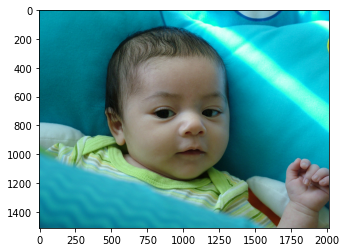

In [ ]:
im2 = cv2.imread(os.path.join(base_path, meta["0"]["in_the_wild"]["file_path"]))
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
plt.imshow(im2)

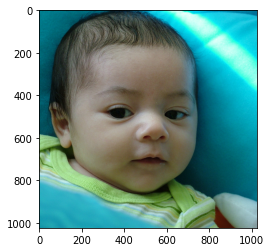

In [ ]:
im1 = cv2.imread(os.path.join(base_path, meta["0"]["image"]["file_path"]))
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
plt.imshow(im1)

In [ ]:
x_scale = 1024 / meta["0"]["in_the_wild"]["pixel_size"][0]
y_scale = 1024 / meta["0"]["in_the_wild"]["pixel_size"][1]

x = int(np.round(meta["0"]["in_the_wild"]["face_rect"][0]*x_scale))
y = int(np.round(meta["0"]["in_the_wild"]["face_rect"][1]*y_scale))
xmax= int(np.round(meta["0"]["in_the_wild"]["face_rect"][2]*(x_scale)))
ymax= int(np.round(meta["0"]["in_the_wild"]["face_rect"][3]*y_scale))

In [ ]:
x, y, xmax, ymax = meta["0"]["in_the_wild"]["face_rect"]

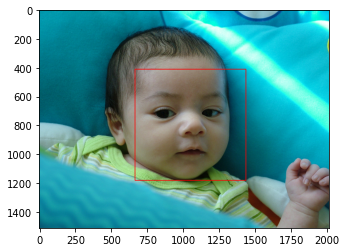

In [ ]:
drawBox([[1,0, x,y,xmax,ymax]],im2)

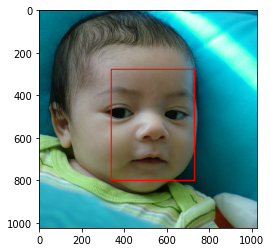

In [ ]:
# 1024 이미지는 원본 bbox label을 사용하지 못할듯
drawBox([[1,0, x,y,xmax,ymax]],im1)

In [ ]:
meta["0"]["in_the_wild"]["face_rect"]

[667, 410, 1438, 1181]

In [ ]:
meta["0"]["in_the_wild"]["pixel_size"]

[2016, 1512]

In [ ]:
y = int(meta[])
cropped_img = img[y: y + h, x: x + w]

In [ ]:
size = []
for i in range(70000):
    size.append(meta[str(i)]["image"]["file_size"])

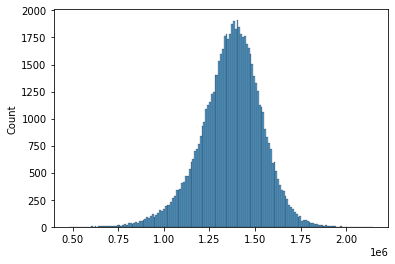

In [ ]:
sns.histplot(size)

In [ ]:
x = []
y = []
for i in range(70000):
    x.append(meta[str(i)]["in_the_wild"]["pixel_size"][0])
    y.append(meta[str(i)]["in_the_wild"]["pixel_size"][1])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


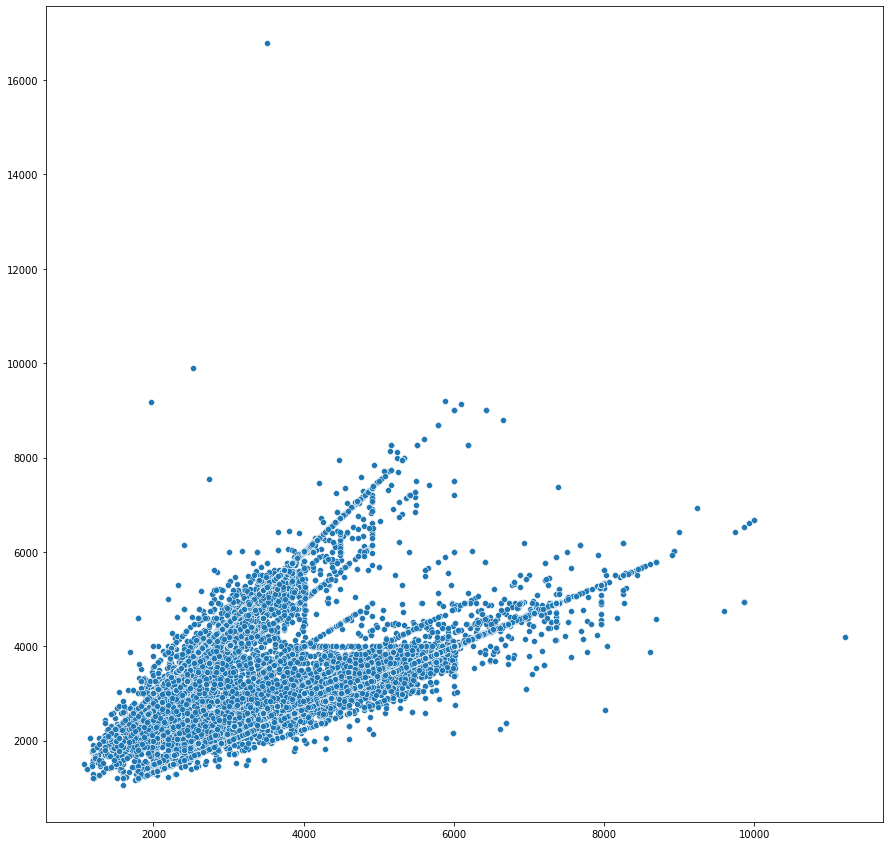

In [ ]:
plt.figure(figsize=(15,15))
sns.scatterplot(x, y)
plt.show()